# Exploratory Data Analysis
German Credit Data

Group 20

In [95]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
# Load the dataset
credit = pd.read_csv('./data/given_german_credit_data.csv',index_col=0) # Please read the csv with 'index_col = 0' configuration to remove unneccesary column

credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [97]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


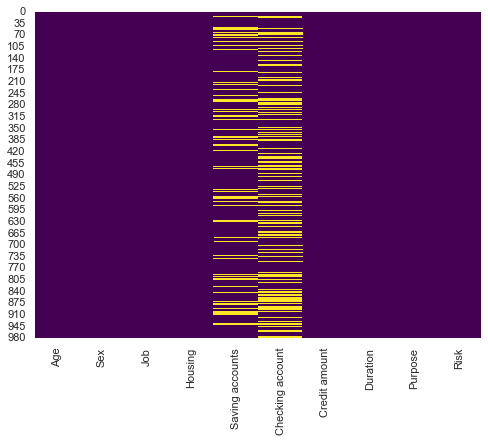

In [98]:
print(credit.isnull().sum())
sns.heatmap(credit.isnull(), cbar=False,cmap = 'viridis')

Checking account and credit amount are the variables with the most missing information.
We can adopt four strategies to handle the missing values:

1. Remove the rows with missing values. However, this would lead to much information loss (>= than 39% of the dataset).
1. Fill in the missing value with the mean or median for that feature. The risk of this approach is that it could add bias.
1. Fill the missing values with info from other features (e.g. for males the mean value for males, and for female the mean value for female). This also adds, or at least perpetuates, bias in the data.
1. Predict the msising value with a model like linear regresstion or KNN.


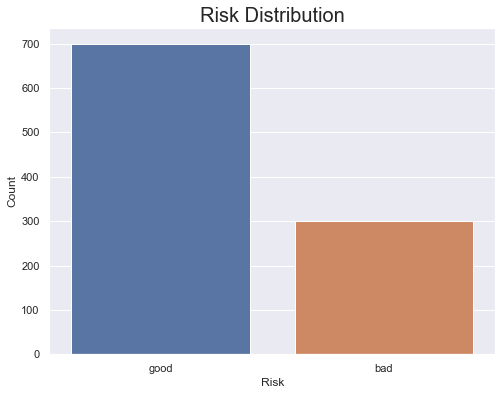

In [99]:
# Target distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Risk",data= credit)                  
g1.set_title("Risk Distribution", fontsize=20)
g1.set_xlabel("Risk")
g1.set_ylabel("Count")
plt.show()

Dataset is not balanced. Oversampling..?

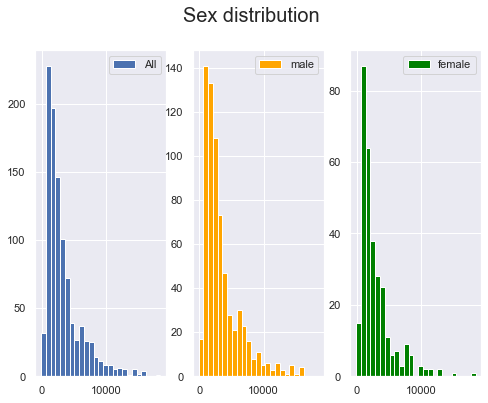

In [100]:
overall = credit['Credit amount'].values  # Total credit amounts
male = credit[credit['Sex'] == 'male']['Credit amount'].values # Credit amounts of male
female = credit[credit['Sex'] == 'female']['Credit amount'].values # Credit amounts of female

plt.suptitle("Sex distribution", fontsize=20)
plt.subplot(1,3,1)
plt.hist(overall, label="All", bins=25, range=(-100,max(overall)+20))
plt.legend()
plt.subplot(1,3,2)
plt.hist(male, label="male", bins=25, color='orange', range=(-100,max(overall)+20))
plt.legend()
plt.subplot(1,3,3)
plt.hist(female, label="female", bins=25, color='green', range=(-100,max(overall)+20))
plt.legend()

The data is unbalanced: amount of credit distribution for females is more skewed to the left (smaller credit amount).

In [101]:
num_females=sum(credit["Sex"]=="female")
num_males=sum(credit["Sex"]=="male")

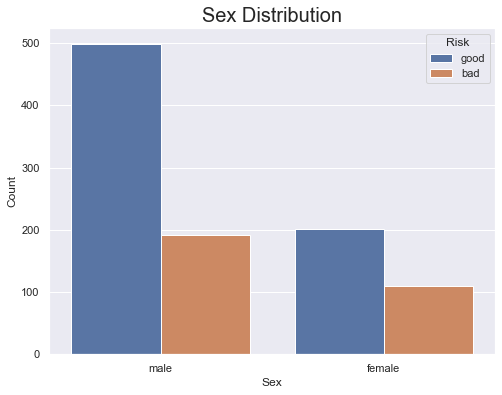

In [102]:
# Sex distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Sex",hue="Risk",data= credit)                  
g1.set_title("Sex Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Sex")
plt.show()

/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


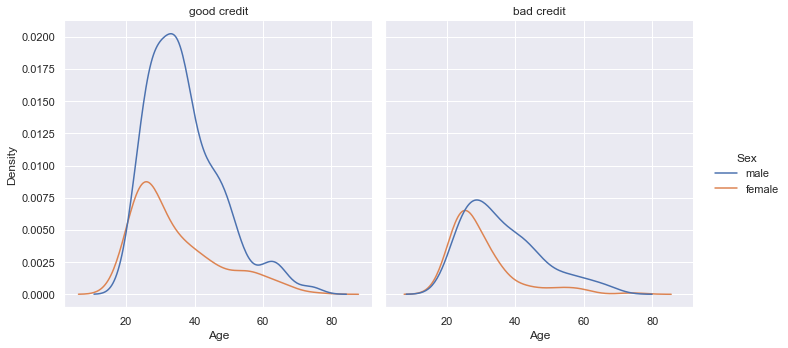

In [135]:
g = sns.displot(data=credit, x="Age", hue="Sex", kind="kde", col = "Risk")
g.set_titles("{col_name} credit")

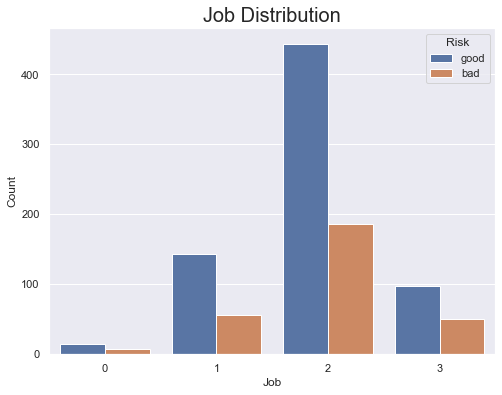

In [103]:
# Job distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Job",hue="Risk",data= credit)                  
g1.set_title("Job Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Job")
plt.show()

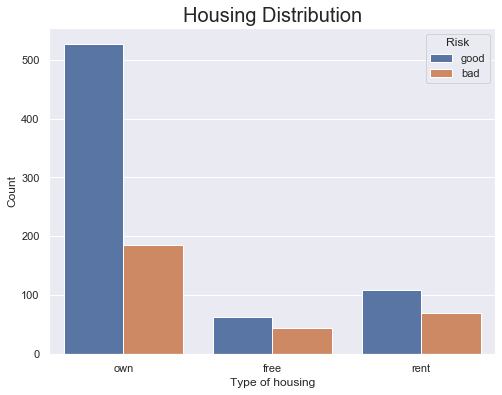

In [104]:
# Type of housing distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Housing",hue="Risk",data= credit)                  
g1.set_title("Housing Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Type of housing")
plt.show()

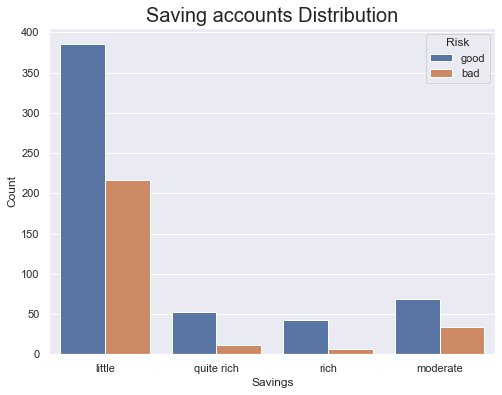

In [105]:
# Saving Accounts distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Saving accounts",hue="Risk",data= credit)                  
g1.set_title("Saving accounts Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Savings")
plt.show()

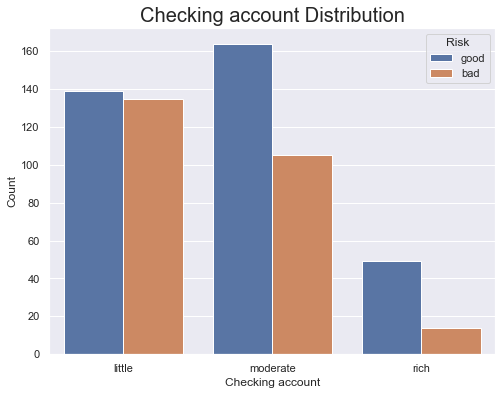

In [106]:
# Checking account distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Checking account",hue="Risk",data= credit)                  
g1.set_title("Checking account Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Checking account")
plt.show()

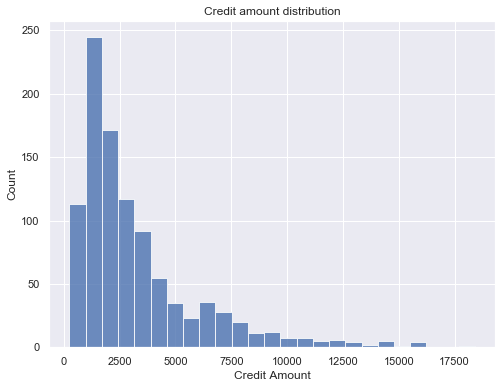

In [107]:
# Credit amount distribution
plt.hist(credit["Credit amount"], label="Credit amount", bins=25, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Credit Amount")
plt.title("Credit amount distribution")
plt.show()

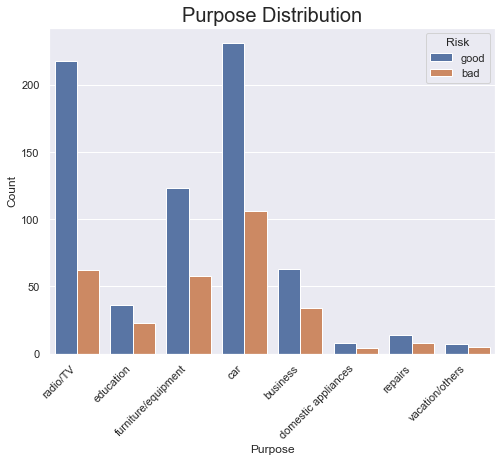

In [110]:
# Purpose distribution
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="Purpose",hue="Risk",data= credit)                  
g1.set_title("Purpose Distribution", fontsize=20)
g1.set_ylabel("Count")
g1.set_xlabel("Purpose")
g1.set_xticklabels(g1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Mean age good credit: 36
Mean age bad credit:34
Median age good credit: 34.0
Median age bad credit:31.0
The data contains some bias for age: younger people are more often classified as Bad Credit.


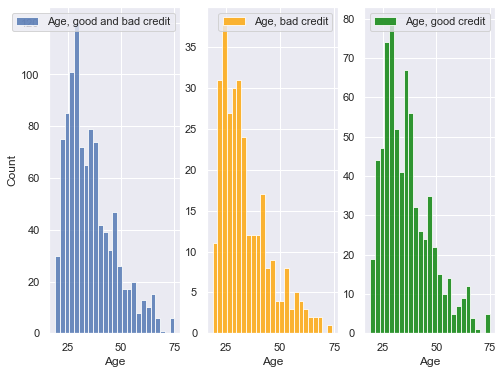

In [111]:
overall_age = credit['Age'].values  # Total credit amounts
good_age = credit[credit['Risk'] == 'good']['Age'].values # Age values filtered for good credit
bad_age = credit[credit['Risk'] == 'bad']['Age'].values # Age values filtered for bad credit

print(f'Mean age good credit: {round(sum(good_age)/len(good_age))}')
print(f'Mean age bad credit:{round(sum(bad_age)/len(bad_age))}')
print(f'Median age good credit: {np.median(good_age)}')
print(f'Median age bad credit:{np.median(bad_age)}')

print("The data contains some bias for age: younger people are more often classified as Bad Credit.")

plt.subplot(1,3,1)
plt.hist(overall_age, label="Age, good and bad credit", bins=25, alpha=0.8)
plt.ylabel("Count")
plt.xlabel("Age")
plt.legend()
plt.subplot(1,3,2)
plt.hist(bad_age, label="Age, bad credit", bins=25, color='orange', alpha=0.8)
plt.xlabel("Age")
plt.legend()
plt.subplot(1,3,3)
plt.hist(good_age, label="Age, good credit", bins=25, color='green', alpha=0.8)
plt.xlabel("Age")
plt.legend()
plt.show()

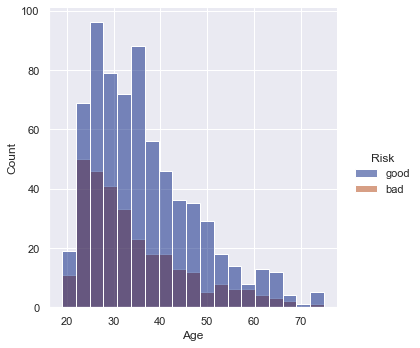

In [141]:
g = sns.displot(data=credit, x="Age", hue="Risk", palette="dark")
g.set_titles("{col_name} credit")

/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/bmassacci/opt/anaconda3/envs/xai/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/bmassacci/op

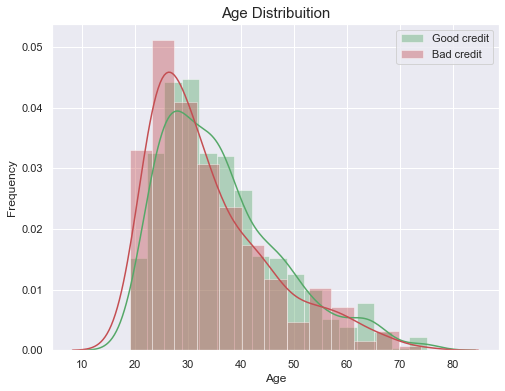

In [112]:
g1 = sns.distplot(good_age, color="g", label="Good credit")
g1 = sns.distplot(bad_age, color='r', label="Bad credit")
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_ylabel("Frequency")
plt.legend()
plt.show()

In [158]:
print(np.mean(good_age), np.std(good_age))
print()
print(np.mean(bad_age), np.std(bad_age))

36.22428571428571 11.373012362785932

33.96333333333333 11.203659620360167


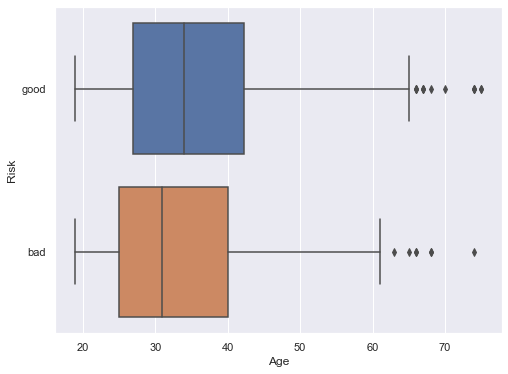

In [167]:
ax = sns.boxplot(x="Age", y = "Risk", data=credit)
#ax = sns.swarmplot(x="Age", y = "Risk", data=credit, color=".8", alpha = ".8")

In [15]:
# Create dummy variables to look at a correlation plot
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [188]:
df_credit = credit
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')
# Bin the age groups
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

# Convert categorical variables to one-hot encoding:
# Purpose
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=False, prefix='Purpose'), left_index=True, right_index=True)
# Sex
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=False, prefix='Housing'), left_index=True, right_index=True)
# Savings accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=False, prefix='Savings'), left_index=True, right_index=True)
# Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk', drop_first=True), left_index=True, right_index=True)
# Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=False, prefix='Check'), left_index=True, right_index=True)
# Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=False, prefix='Age_cat'), left_index=True, right_index=True)


df_credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Age_cat',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Savings_little',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_good', 'Check_little', 'Check_moderate',
       'Check_no_inf', 'Check_rich', 'Age_cat_Student', 'Age_cat_Young',
       'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [189]:
#Excluding the redundant columns that we converted into one-hot encoding
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit["Age"]

df_credit.columns

Index(['Job', 'Credit amount', 'Duration', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_free', 'Housing_own',
       'Housing_rent', 'Savings_little', 'Savings_moderate', 'Savings_no_inf',
       'Savings_quite rich', 'Savings_rich', 'Risk_good', 'Check_little',
       'Check_moderate', 'Check_no_inf', 'Check_rich', 'Age_cat_Student',
       'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

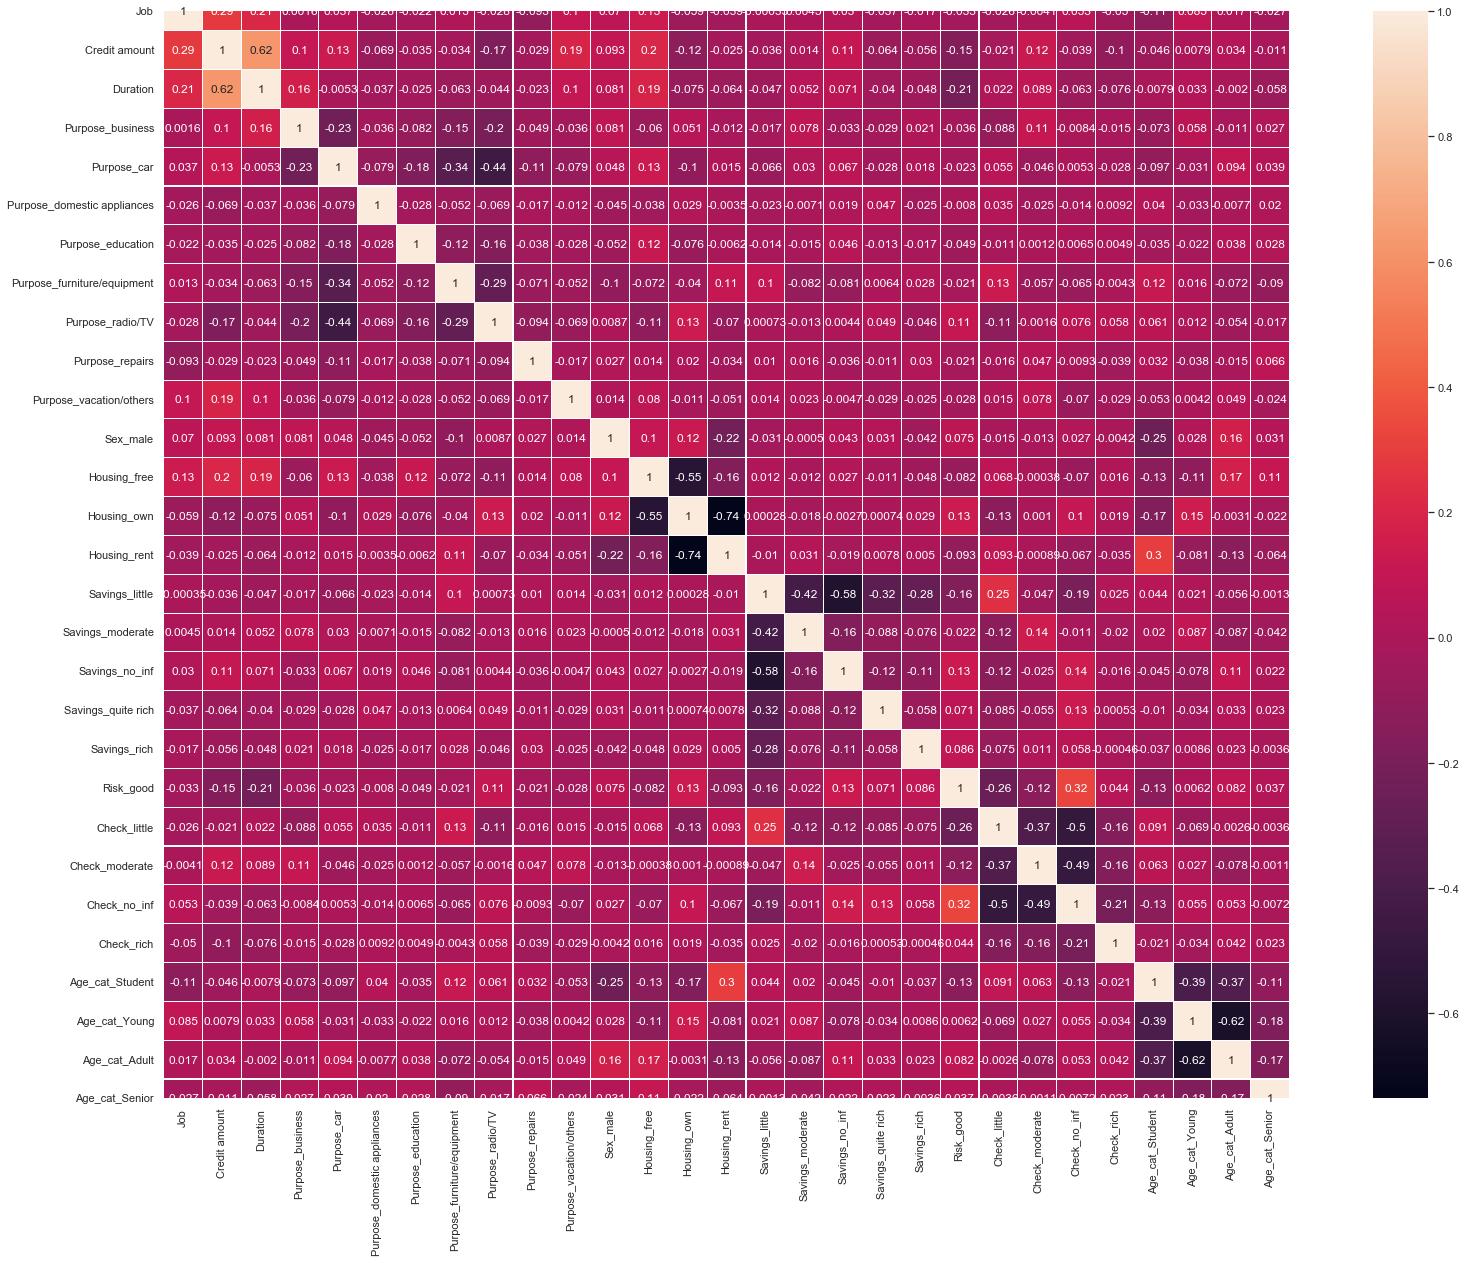

In [190]:
plt.figure(figsize=(30,20))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [191]:
df_corr = df_credit.astype(float).corr()

threshold = 0.2

columns = df_corr.columns

print(f'features with a correlation greater than +/- {threshold} \n')
print(f'{"Feature 1" : <30} {"Feature 2" : <30}{"Correlation" : >5}')
print()
for col in df_corr.columns:
    for idx, el in enumerate(df_corr[col]):
        if el < 0.3 and el > -0.3:
            #df_corr[col][idx] = int(0)
            pass
        else:
            if col != columns[idx]:
                print(f'{col : <30} {columns[idx] : <30} {df_corr[col][idx] : >5}')

features with a correlation greater than +/- 0.2 

Feature 1                      Feature 2                     Correlation

Credit amount                  Duration                       0.6249841983009851
Duration                       Credit amount                  0.6249841983009851
Purpose_car                    Purpose_furniture/equipment    -0.33516257840473984
Purpose_car                    Purpose_radio/TV               -0.4446015308115042
Purpose_furniture/equipment    Purpose_car                    -0.33516257840473984
Purpose_radio/TV               Purpose_car                    -0.4446015308115042
Housing_free                   Housing_own                    -0.5484452343874122
Housing_own                    Housing_free                   -0.5484452343874122
Housing_own                    Housing_rent                   -0.7359676982390787
Housing_rent                   Housing_own                    -0.7359676982390787
Savings_little                 Savings_moderate        

In [71]:
columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')